In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pymongo import MongoClient
import seaborn as sns


In [2]:
try:
    mongo_client = MongoClient("mongodb+srv://<user>:<password>@okcupid.njnu4m5.mongodb.net/") #Update Your Code Here
    print("Connected to MongoDB Atlas")
except ServerSelectionTimeoutError as e:
    print(f"Error connecting to MongoDB Atlas: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Connected to MongoDB Atlas


In [3]:
mongo_database = mongo_client.OKCupid
mongo_collection = mongo_database.OKCupid

In [4]:
all_documents = mongo_collection.find().limit(10)

In [5]:
for item in all_documents:
    print(item)

{'_id': ObjectId('66043c9f0d794818da3d5519'), 'age': 29, 'status': 'single', 'sex': 'm', 'orientation': 'straight', 'body_type': 'average', 'diet': 'mostly anything', 'drinks': 'socially', 'education': 'graduated from college/university', 'ethnicity': 'white', 'height': 67, 'income': -1, 'job': 'computer / hardware / software', 'last_online': '2012-06-29-19-18', 'location': 'san francisco, california', 'offspring': "doesn't have kids, but might want them", 'pets': 'likes cats', 'religion': 'atheism', 'sign': 'taurus', 'smokes': 'no', 'speaks': 'english (fluently), chinese (okay)', 'essay0': "i'm an australian living in san francisco, but don't hold that against me. i spend most of my days trying to build cool stuff for my company. i speak mandarin and have been known to bust out chinese songs at karaoke. i'm pretty cheeky. someone asked me if that meant something about my arse, which i find really funny.  i'm a little oddball. i have a wild imagination; i like to think of the most impr

## Query-> Analysis of Habits and Relationships 

We aim to analyze preferences in habits from essay2 and essay6 to understand how they influence relationship statuses. Specifically, I'll explore preferences regarding drinking, smoking, diet, use, etc., and correlate these with the individual's relationship status.


#### NoSQL query to get distinct values for diet

In [6]:
# Create pipelines with status
diet_pipeline_with_status = [
    {
#         Filters documents where the diet field exists and is not None, an empty string (''), or the string 'null'.
        '$match': {
            'diet': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}
        }
    },
    {
#         Groups the documents by diet and status.
#         Computes the count of documents in each group.
        '$group': {
            '_id': {'diet': '$diet', 'status': '$status'},
            'count': {'$sum': 1}
        }
    }
]



# Execute the aggregation pipeline for diet
diet_with_status_results = list(mongo_database.OKCupid.aggregate(diet_pipeline_with_status, allowDiskUse=True))

# Print distinct values for diet
for result in diet_with_status_results:
    print(result['_id'], result['count'])



{'diet': 'vegan', 'status': 'single'} 116
{'diet': 'strictly anything', 'status': 'seeing someone'} 173
{'diet': 'strictly other', 'status': 'seeing someone'} 22
{'diet': 'other', 'status': 'married'} 1
{'diet': 'strictly vegan', 'status': 'available'} 14
{'diet': 'anything', 'status': 'seeing someone'} 152
{'diet': 'strictly vegan', 'status': 'single'} 192
{'diet': 'mostly anything', 'status': 'married'} 54
{'diet': 'mostly vegan', 'status': 'seeing someone'} 7
{'diet': 'strictly halal', 'status': 'available'} 1
{'diet': 'vegan', 'status': 'available'} 11
{'diet': 'vegan', 'status': 'seeing someone'} 8
{'diet': 'mostly vegetarian', 'status': 'married'} 25
{'diet': 'vegetarian', 'status': 'married'} 2
{'diet': 'strictly vegetarian', 'status': 'available'} 46
{'diet': 'halal', 'status': 'single'} 11
{'diet': 'mostly halal', 'status': 'married'} 2
{'diet': 'vegetarian', 'status': 'single'} 620
{'diet': 'mostly other', 'status': 'single'} 942
{'diet': 'mostly anything', 'status': 'unknown

#### NoSQL query to get distinct values for drinks

In [7]:
drinks_pipeline_with_status = [
    {
        '$match': {
            'drinks': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}
        }
    },
    {
        '$group': {
            '_id': {'drinks': '$drinks', 'status': '$status'},
            'count': {'$sum': 1}
        }
    }
]

# Execute the aggregation pipeline for drinks
drinks_with_status_results = list(mongo_database.OKCupid.aggregate(drinks_pipeline_with_status, allowDiskUse=True))

# Print distinct values for drinks
for result in drinks_with_status_results:
    print(result['_id'], result['count'])

{'drinks': 'desperately', 'status': 'available'} 21
{'drinks': 'rarely', 'status': 'single'} 5400
{'drinks': 'often', 'status': 'single'} 4656
{'drinks': 'rarely', 'status': 'available'} 229
{'drinks': 'often', 'status': 'available'} 217
{'drinks': 'not at all', 'status': 'unknown'} 2
{'drinks': 'desperately', 'status': 'seeing someone'} 13
{'drinks': 'socially', 'status': 'married'} 186
{'drinks': 'not at all', 'status': 'married'} 19
{'drinks': 'rarely', 'status': 'unknown'} 2
{'drinks': 'socially', 'status': 'single'} 39085
{'drinks': 'socially', 'status': 'available'} 1190
{'drinks': 'rarely', 'status': 'married'} 59
{'drinks': 'not at all', 'status': 'single'} 2993
{'drinks': 'very often', 'status': 'single'} 432
{'drinks': 'desperately', 'status': 'married'} 4
{'drinks': 'socially', 'status': 'seeing someone'} 1313
{'drinks': 'very often', 'status': 'married'} 3
{'drinks': 'not at all', 'status': 'available'} 122
{'drinks': 'desperately', 'status': 'single'} 284
{'drinks': 'rarel

#### NoSQL query to get distinct values for smokes

In [8]:
smokes_pipeline_with_status = [
    {
        '$match': {
            'smokes': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}
        }
    },
    {
        '$group': {
            '_id': {'smokes': '$smokes', 'status': '$status'},
            'count': {'$sum': 1}
        }
    }
]

# Execute the aggregation pipeline for smokes
smokes_with_status_results = list(mongo_database.OKCupid.aggregate(smokes_pipeline_with_status, allowDiskUse=True))

# Print distinct values for smokes
for result in smokes_with_status_results:
    print(result['_id'], result['count'])

{'smokes': 'trying to quit', 'status': 'single'} 1376
{'smokes': ' seems important to say', 'status': 'simple and potent people met in everyday life ... (which especially includes infants and children) athlete'} 1
{'smokes': 'no', 'status': 'married'} 248
{'smokes': 'no', 'status': 'single'} 40761
{'smokes': 'no', 'status': 'seeing someone'} 1526
{'smokes': 'when drinking', 'status': 'seeing someone'} 122
{'smokes': 'sometimes', 'status': 'married'} 16
{'smokes': 'when drinking', 'status': 'single'} 2801
{'smokes': 'no', 'status': 'available'} 1352
{'smokes': 'when drinking', 'status': 'available'} 95
{'smokes': 'trying to quit', 'status': 'seeing someone'} 51
{'smokes': 'sometimes', 'status': 'seeing someone'} 135
{'smokes': 'yes', 'status': 'married'} 6
{'smokes': 'yes', 'status': 'seeing someone'} 95
{'smokes': 'trying to quit', 'status': 'married'} 3
{'smokes': 'yes', 'status': 'available'} 87
{'smokes': 'sometimes', 'status': 'available'} 158
{'smokes': 'yes', 'status': 'single'} 

In [9]:
# Create DataFrames with status
diet_df_with_status = pd.DataFrame(diet_with_status_results)
drinks_df_with_status = pd.DataFrame(drinks_with_status_results)
smokes_df_with_status = pd.DataFrame(smokes_with_status_results)


In [10]:
print(diet_with_status_results[:5])


[{'_id': {'diet': 'vegan', 'status': 'single'}, 'count': 116}, {'_id': {'diet': 'strictly anything', 'status': 'seeing someone'}, 'count': 173}, {'_id': {'diet': 'strictly other', 'status': 'seeing someone'}, 'count': 22}, {'_id': {'diet': 'other', 'status': 'married'}, 'count': 1}, {'_id': {'diet': 'strictly vegan', 'status': 'available'}, 'count': 14}]


### Separating keywords from essay2 and essay 6 columns using No SQL

In [11]:
pipeline = [
    {
        '$match': {
            '$and': [
                # Structured attributes
                # Filters documents based on several conditions using $and.
                # Checks for the existence and non-null values of status, diet, drinks, smokes, essay2, and essay6 fields.
                {'status': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}},
                {'diet': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}},
                {'drinks': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}},
                {'smokes': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}},
                
                # Essay fields
                {'$or': [
                    {'essay2': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}},
                    {'essay6': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}}
                ]}
            ]
        }
    },
    
    {
       # Projects specific fields and creates keyword lists for essay2 and essay6.
       # Splits the essay text into keywords and removes any empty strings.
        '$project': {
            'status': 1,
            'diet': 1,
            'drinks': 1,
            'smokes': 1,
            
            'essay2_keywords': {'$split': [{'$ifNull': [{'$reduce': {
                'input': {'$split': [{'$ifNull': [{'$convert': {'input': '$essay2', 'to': 'string'}}, '']}, ' ']},
                'initialValue': '',
                'in': {'$concat': ['$$value', ' ', '$$this']}
            }}, '']}, ' ']},
            
            'essay6_keywords': {'$split': [{'$ifNull': [{'$reduce': {
                'input': {'$split': [{'$ifNull': [{'$convert': {'input': '$essay6', 'to': 'string'}}, '']}, ' ']},
                'initialValue': '',
                'in': {'$concat': ['$$value', ' ', '$$this']}
            }}, '']}, ' ']},
        }
    },
    
    {
        # Filters out documents where both essay2_keywords and essay6_keywords are empty.
        '$match': {
            '$or': [
                {'essay2_keywords': {'$ne': []}},
                {'essay6_keywords': {'$ne': []}}
            ]
        }
    }
]

# Execute the aggregation pipeline
results = list(mongo_collection.aggregate(pipeline))

# Convert results to DataFrame
df = pd.DataFrame(results)



In [12]:
type(results)

list

In [13]:
results[0]

{'_id': ObjectId('66043c9f0d794818da3d5519'),
 'status': 'single',
 'diet': 'mostly anything',
 'drinks': 'socially',
 'smokes': 'no',
 'essay2_keywords': ['',
  'imagining',
  'random',
  'shit.',
  'laughing',
  'at',
  'aforementioned',
  'random',
  'shit.',
  'being',
  'goofy.',
  'articulating',
  'what',
  'i',
  'think',
  'and',
  'feel.',
  'convincing',
  'people',
  "i'm",
  'right.',
  'admitting',
  'when',
  "i'm",
  'wrong.',
  '',
  "i'm",
  'also',
  'pretty',
  'good',
  'at',
  'helping',
  'people',
  'think',
  'through',
  'problems;',
  'my',
  'friends',
  'say',
  'i',
  'give',
  'good',
  'advice.',
  'and',
  'when',
  'i',
  "don't",
  'have',
  'a',
  'clue',
  'how',
  'to',
  'help,',
  'i',
  'will',
  'say:',
  'i',
  'give',
  'pretty',
  'good',
  'hug.'],
 'essay6_keywords': ['',
  'what',
  'my',
  'contribution',
  'to',
  'the',
  'world',
  'is',
  'going',
  'to',
  'be',
  'and/or',
  'should',
  'be.',
  'and',
  "what's",
  'for',
  'break

In [14]:
# Combine keywords into a single column
df['combined_keywords'] = df['essay2_keywords'] + df['essay6_keywords']
# Group by status and combine keywords
grouped_df = df.groupby('status')['combined_keywords'].sum().reset_index()


#### Correlating diet,drink, smokes with the essay 2 and essay 6 combined words

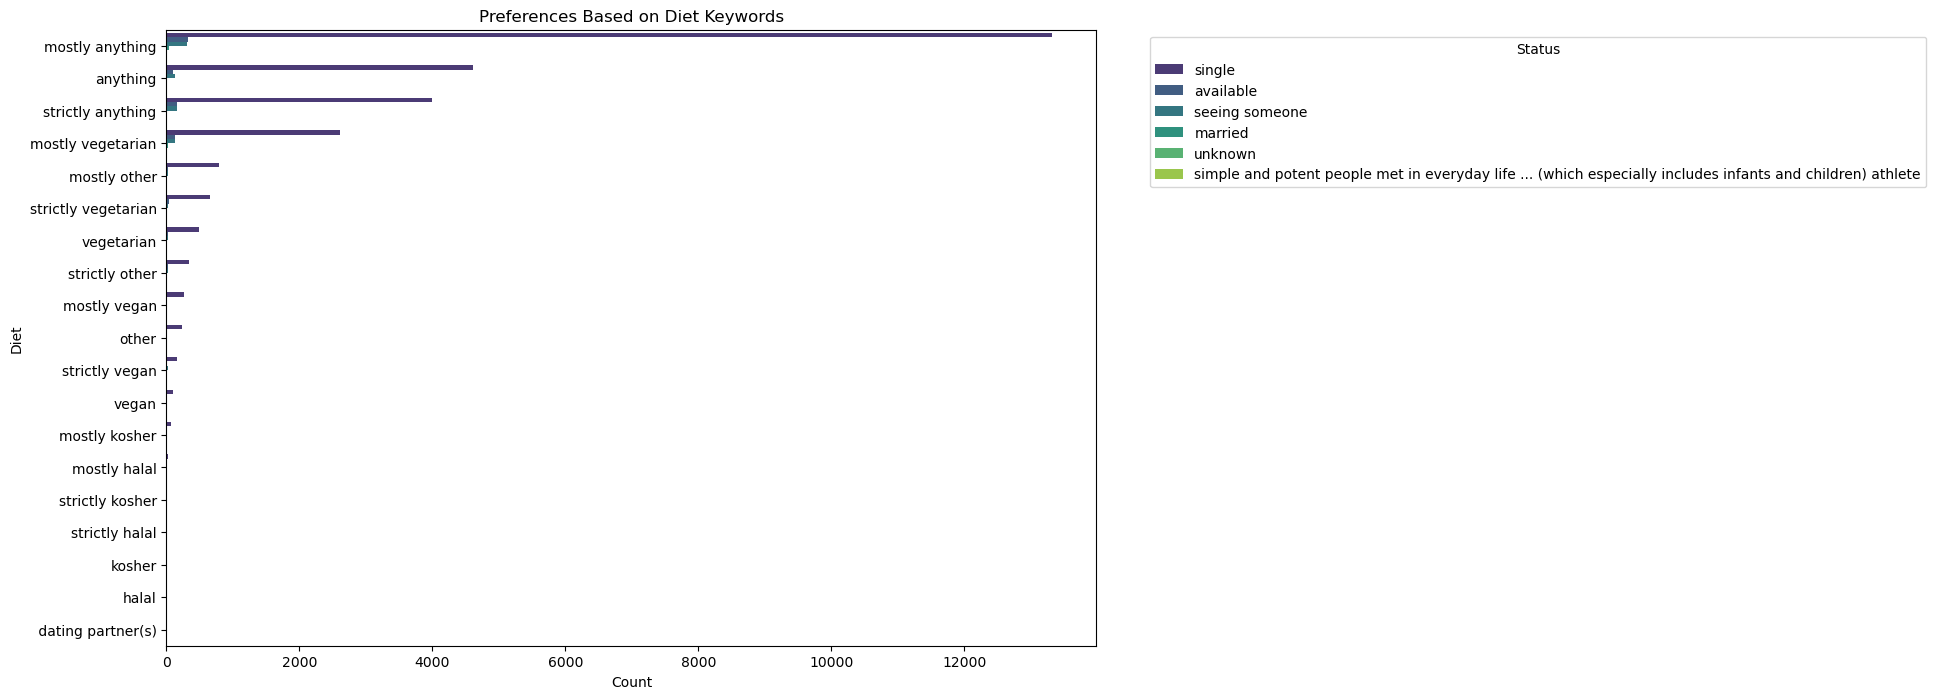

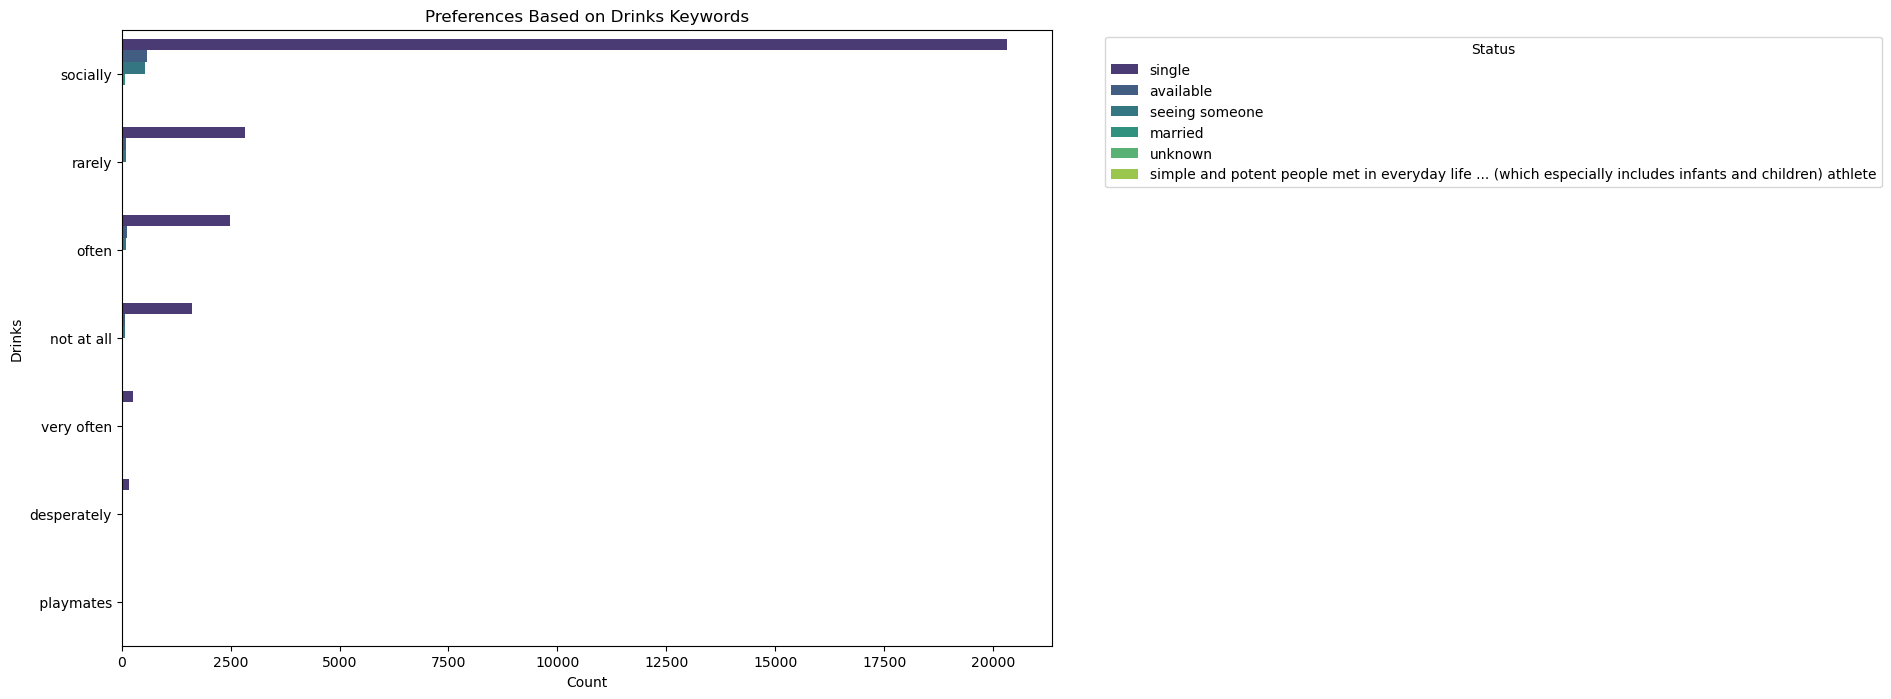

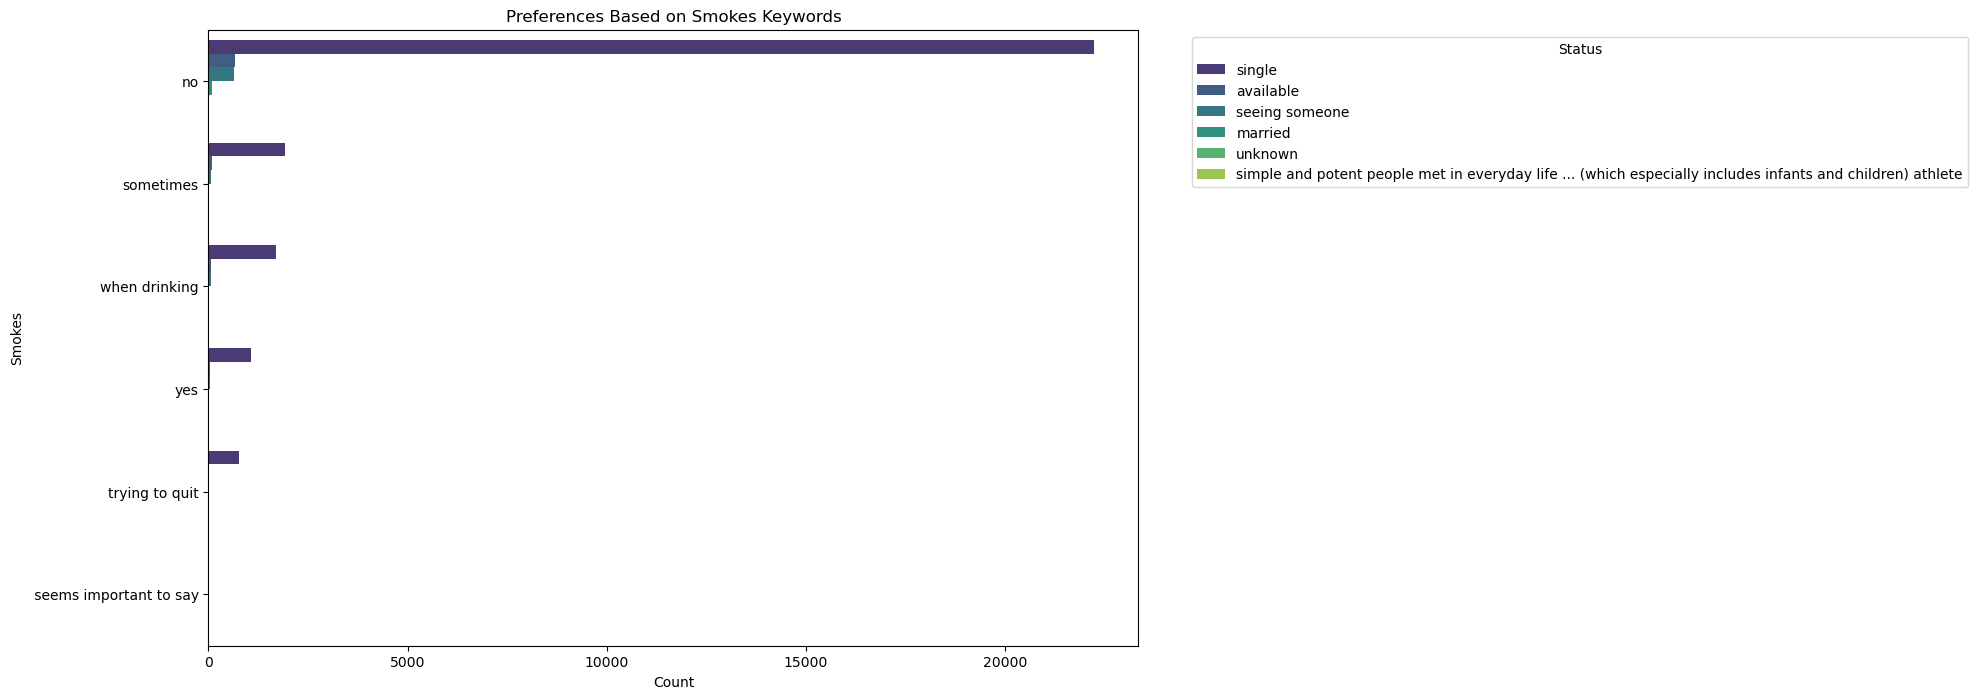

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_preferences_by_keywords(df, preference_column, title):
    # Count frequency of each preference based on keywords and status
    preference_count = df.groupby([preference_column, 'status'])['combined_keywords'].size().reset_index(name='count')
    
    # Sort by count
    preference_count = preference_count.sort_values(by='count', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='count', y=preference_column, hue='status', data=preference_count, palette='viridis')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel(preference_column.capitalize())
    plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plot preferences based on diet
plot_preferences_by_keywords(df, 'diet', 'Preferences Based on Diet Keywords')

# Plot preferences based on drinks
plot_preferences_by_keywords(df, 'drinks', 'Preferences Based on Drinks Keywords')

# Plot preferences based on smokes
plot_preferences_by_keywords(df, 'smokes', 'Preferences Based on Smokes Keywords')



#### Observations:

1. Dietary Flexibility: Singles tend to gravitate towards less restrictive dietary patterns compared to their married counterparts. This is evident in the higher proportion of singles following "anything" or "mostly anything" diets compared to married individuals.

2. Social Drinking: The data suggests a high prevalence of social drinking among single individuals. This might be linked to factors like socializing in bars or restaurants, or simply enjoying occasional drinks without the influence of a partner's preferences.

3. Health Focus: Despite the prevalence of social drinking, the graph reveals a surprisingly high number of non-smoking singles. This indicates a potential health focus among this group, with some choosing to avoid smoking while still enjoying occasional social drinks.

#### What these Traits Tell Us:

* These observations paint a picture of singles who prioritize flexibility and social connection. Their dietary choices suggest a willingness to explore different options, while social drinking habits might reflect active social lives. Interestingly, the high number of non-smokers among singles indicates a potential health-conscious side that coexists with their social tendencies.
